# #WaveSight

In [330]:
%load_ext autoreload
%autoreload 2
# assuming there's a file scripto.py in the same folder as the ipynb
import wavesight as ws
import sympy as sp
import numpy as np
from scipy import special
import matplotlib.pyplot as plt
from scipy.optimize import fsolve, root_scalar

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


/Users/juan/ZiaLab/Codebase/wavesight/wavesight.py:19: RuntimeWarning: invalid value encountered in sqrt
  return  (n1**2*(special.jv(-1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)) - special.jv(1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))))/(2.*a*n0**2*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)*special.jv(n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))) + (-special.kn(-1 + n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)) - special.kn(1 + n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)))/(2.*a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)*special.kn(n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)))


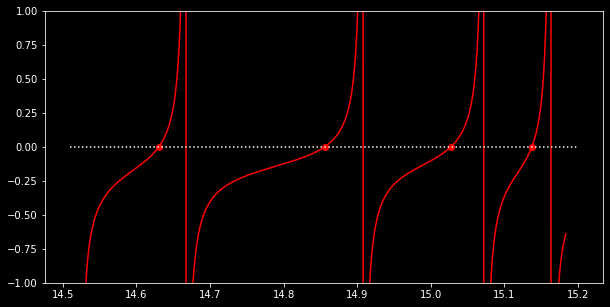

In [464]:
nCore = 1.45
nCladding = 1.387
coreRadius = 3.
wavelength = 0.6
tmfun = ws.tmfungen(λfree=wavelength, 
                 n=0, 
                 n0=nCladding, 
                 n1=nCore, 
                 a=coreRadius)
γmax = 1.001*nCore*2*np.pi/wavelength
γmin = 0.999*nCladding*2*np.pi/wavelength
γrange = np.linspace(γmin, γmax, 1000)
tmvals = tmfun(γrange)
tmzeros = ws.findallroots(tmfun, γmin, γmax, 0.01, method='bisect', num_decimals=6, verbose=False)
tmzerocheck = tmfun(tmzeros)
plt.figure(figsize=(10,5))
plt.plot(γrange, tmvals, 'r')
plt.scatter(tmzeros,tmzerocheck, c='r')
plt.plot([γmin, γmax], [0,0], "w:")
plt.ylim(-1,1)
plt.show()

/Users/juan/ZiaLab/Codebase/wavesight/wavesight.py:25: RuntimeWarning: invalid value encountered in sqrt
  return (special.jv(-1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)) - special.jv(1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)))/(2.*a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)*special.jv(n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))) + (-special.kn(-1 + n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)) - special.kn(1 + n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)))/(2.*a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)*special.kn(n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)))


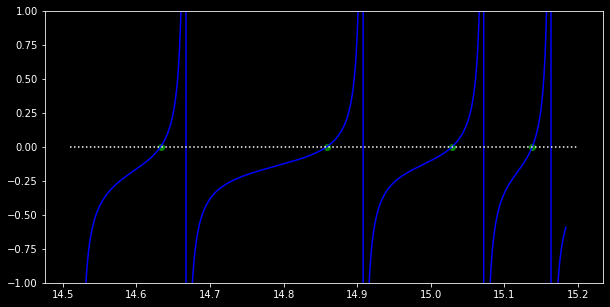

In [465]:
nCore = 1.45
nCladding = 1.387
coreRadius = 3.
wavelength = 0.6
tefun = ws.tefungen(λfree=wavelength, 
                 n=0, 
                 n0=nCladding, 
                 n1=nCore, 
                 a=coreRadius)
γmax = 1.001*nCore*2*np.pi/wavelength
γmin = 0.999*nCladding*2*np.pi/wavelength
γrange = np.linspace(γmin, γmax, 1000)
tevals = tefun(γrange)
tezeros = ws.findallroots(tefun, γmin, γmax, 0.01, method='bisect', num_decimals=6)
tezerocheck = tefun(tezeros)
plt.figure(figsize=(10,5))
plt.plot(γrange, tevals, 'b')
plt.scatter(tezeros,tezerocheck, c='g')
plt.plot([γmin, γmax], [0,0], "w:")
plt.ylim(-1,1)
plt.show()

/Users/juan/ZiaLab/Codebase/wavesight/wavesight.py:30: RuntimeWarning: invalid value encountered in sqrt
  return  -((n**2*(1/(γ**2 - (4*n0**2*np.pi**2)/λfree**2) + 1/(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))*(1/(a**2*(γ**2 - (4*n0**2*np.pi**2)/λfree**2)) + n1**2/(a**2*n0**2*(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))))/a**2) + ((special.jv(-1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)) - special.jv(1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)))/(2.*a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)*special.jv(n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))) + (-special.kn(-1 + n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)) - special.kn(1 + n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)))/(2.*a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)*special.kn(n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2))))*((n1**2*(special.jv(-1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)) - special.jv(1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))))/(2.*a*n0**2*np.sqrt(-γ**2 + (4*n1**2*

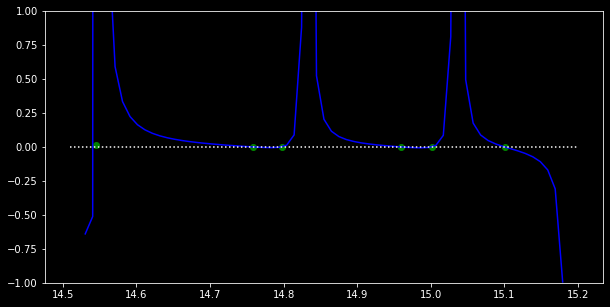

In [466]:
nCore = 1.45
nCladding = 1.387
coreRadius = 3.
wavelength = 0.6
n=3
hefun = ws.hefungen(λfree=wavelength, 
                 n=n, 
                 n0=nCladding, 
                 n1=nCore, 
                 a=coreRadius)
γmax = 1.001*nCore*2*np.pi/wavelength
γmin = 0.999*nCladding*2*np.pi/wavelength
# γrange = np.linspace(γmin, γmax, 1000)
dx = 0.01
γrange = np.linspace(γmin, γmax, int(np.ceil((γmax-γmin)/dx)))
hevals = hefun(γrange)
zc = ws.zerocrossings(hevals)
zcvals = hevals[zc]
good_crossings = np.where(~np.isnan(zcvals))
zcvals = zcvals[good_crossings]
zc = zc[good_crossings]
hezeros = ws.findallroots(hefun, γmin, γmax, dx, method='bisect', num_decimals=6, verbose=False)
hezerocheck = hefun(hezeros)
plt.figure(figsize=(10,5))
plt.plot(γrange, hevals, 'b')
plt.scatter(hezeros,hezerocheck, c='g')
plt.plot([γmin, γmax], [0,0], "w:")
plt.ylim(-1,1)
plt.show()

In [741]:
# nCore = 1.45
# nCladding = 1.39657
# coreRadius = 3.
# wavelength = 0.6
# tmfun = ws.tmfungen(λfree=wavelength, 
#                  n=0, 
#                  n0=nCladding, 
#                  n1=nCore, 
#                  a=coreRadius)
# γmax = 1.001*nCore*2*np.pi/wavelength
# γmin = 0.999*nCladding*2*np.pi/wavelength
# γrange = np.linspace(γmin, γmax, 1000)
# tmvals = tmfun(γrange)
# tmzeros = ws.findallroots(tmfun, γmin, γmax, 0.01, method='bisect', num_decimals=6, verbose=False)
# tmzerocheck = tmfun(tmzeros)
# plt.figure(figsize=(10,5))
# plt.plot(γrange, tmvals, 'r')
# plt.scatter(tmzeros,tmzerocheck, c='r')
# plt.plot([γmin, γmax], [0,0], "w:")
# plt.ylim(-1,1)
# plt.show()

In [742]:
# # debugging missing roots
# nCore = 1.45
# NA = 0.39
# nCladding = np.sqrt(nCore**2 - NA**2)
# coreRadius = 5.
# wavelength = 0.6
# dx = 0.0001
# Vnum = 2*np.pi * coreRadius * NA / wavelength
# numModes = int(Vnum**2/2)
# drawPlots = False

# print("Approx number of modes: ", numModes)

# γmax = nCore*2*np.pi/wavelength
# γmin = nCladding*2*np.pi/wavelength
# γspan = γmax - γmin
# γmax = γmax - 0.001*γspan
# γmin = γmin + 0.001*γspan

# tmfun = ws.tmfungen(λfree=wavelength, 
#                  n=0, 
#                  n0=nCladding, 
#                  n1=nCore, 
#                  a=coreRadius)

# tefun = ws.tefungen(λfree=wavelength, 
#                  n=0, 
#                  n0=nCladding, 
#                  n1=nCore, 
#                  a=coreRadius)

# temodes = ws.findallroots(tefun, γmin, γmax, dx, method='brentq', num_decimals=6, verbose=True)

# γrange = np.linspace(γmin, γmax, 1000)
# tmvals = tmfun(γrange)
# tevals = tefun(γrange)
# tezerocheck = tefun(temodes)


# zerocrossindices = ws.zerocrossings(tevals)
# zcvals = tevals[zerocrossindices]
# good_crossings = np.where(~np.isnan(zcvals))
# zcvals = zcvals[good_crossings]
# zerocrossindices = zerocrossindices[good_crossings]

# plt.figure(figsize=(10,5))
# plt.plot(γrange, tevals, 'r')
# plt.scatter(temodes,tezerocheck, c='b')
# plt.scatter(γrange[zerocrossindices], zcvals+0.1, c='g')
# plt.plot([γmin, γmax], [0,0], "w:")
# plt.plot((15.136385856747761, 15.197052673140718),[0,0],'wx')
# plt.ylim(-1,1)
# plt.show()



In [740]:
fiber_spec = {'NA': 0.39,
              'nCore': 1.45,
              'coreRadius':75.,
              'free_space_wavelength': 0.532}
fiber_sol = ws.multisolver(fiber_spec, drawPlots=False, verbose=True)

Approx number of complex HE modes:  29662
Approx number of TE modes:  172
Approx number of TE modes:  172
Approx number of total modes:  59670
Calculting TE(0,n) propagation constants...
Calculting TM(0,n) propagation constants...
Calculting HE(n,m) propagation constants...
n=1|

/Users/juan/ZiaLab/Codebase/wavesight/wavesight.py:98: RuntimeWarning: invalid value encountered in sqrt
  return  -((n**2*(1/(γ**2 - (4*n0**2*np.pi**2)/λfree**2) + 1/(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))*(1/(a**2*(γ**2 - (4*n0**2*np.pi**2)/λfree**2)) + n1**2/(a**2*n0**2*(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))))/a**2) + ((special.jv(-1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)) - special.jv(1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)))/(2.*a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)*special.jv(n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))) + (-special.kn(-1 + n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)) - special.kn(1 + n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)))/(2.*a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)*special.kn(n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2))))*((n1**2*(special.jv(-1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)) - special.jv(1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))))/(2.*a*n0**2*np.sqrt(-γ**2 + (4*n1**2*

n=2|n=3|n=4|n=5|n=6|n=7|n=8|n=9|n=10|n=11|n=12|n=13|n=14|n=15|n=16|n=17|n=18|n=19|n=20|n=21|n=22|n=23|n=24|n=25|n=26|n=27|n=28|n=29|n=30|n=31|n=32|n=33|n=34|n=35|n=36|n=37|n=38|n=39|n=40|n=41|n=42|n=43|n=44|n=45|n=46|n=47|n=48|n=49|n=50|n=51|n=52|n=53|n=54|n=55|n=56|n=57|n=58|n=59|n=60|n=61|n=62|n=63|n=64|n=65|n=66|n=67|n=68|n=69|n=70|n=71|n=72|n=73|n=74|n=75|n=76|n=77|n=78|n=79|n=80|n=81|n=82|n=83|n=84|n=85|n=86|n=87|n=88|n=89|n=90|n=91|n=92|n=93|n=94|n=95|n=96|n=97|n=98|n=99|n=100|n=101|n=102|n=103|n=104|n=105|n=106|n=107|n=108|n=109|n=110|n=111|n=112|n=113|n=114|n=115|n=116|n=117|n=118|n=119|n=120|n=121|n=122|n=123|n=124|n=125|n=126|n=127|n=128|n=129|n=130|n=131|n=132|n=133|n=134|n=135|n=136|n=137|n=138|n=139|n=140|n=141|n=142|n=143|n=144|n=145|n=146|n=147|n=148|n=149|n=150|n=151|n=152|n=153|n=154|n=155|n=156|n=157|n=158|n=159|n=160|n=161|n=162|n=163|n=164|n=165|n=166|n=167|n=168|n=169|n=170|n=171|n=172|n=173|n=174|n=175|n=176|n=177|n=178|n=179|n=180|n=181|n=182|n=183|n=184|n=185|n=

/Users/juan/ZiaLab/Codebase/wavesight/wavesight.py:98: RuntimeWarning: divide by zero encountered in true_divide
  return  -((n**2*(1/(γ**2 - (4*n0**2*np.pi**2)/λfree**2) + 1/(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))*(1/(a**2*(γ**2 - (4*n0**2*np.pi**2)/λfree**2)) + n1**2/(a**2*n0**2*(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))))/a**2) + ((special.jv(-1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)) - special.jv(1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)))/(2.*a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)*special.jv(n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))) + (-special.kn(-1 + n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)) - special.kn(1 + n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)))/(2.*a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)*special.kn(n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2))))*((n1**2*(special.jv(-1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)) - special.jv(1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))))/(2.*a*n0**2*np.sqrt(-γ**2 + (

n=242|

/Users/juan/ZiaLab/Codebase/wavesight/wavesight.py:98: RuntimeWarning: invalid value encountered in true_divide
  return  -((n**2*(1/(γ**2 - (4*n0**2*np.pi**2)/λfree**2) + 1/(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))*(1/(a**2*(γ**2 - (4*n0**2*np.pi**2)/λfree**2)) + n1**2/(a**2*n0**2*(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))))/a**2) + ((special.jv(-1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)) - special.jv(1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)))/(2.*a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)*special.jv(n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))) + (-special.kn(-1 + n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)) - special.kn(1 + n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)))/(2.*a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)*special.kn(n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2))))*((n1**2*(special.jv(-1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)) - special.jv(1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))))/(2.*a*n0**2*np.sqrt(-γ**2 + (4

n=243|n=244|n=245|n=246|n=247|n=248|n=249|n=250|n=251|n=252|n=253|n=254|n=255|n=256|n=257|n=258|n=259|n=260|n=261|n=262|n=263|n=264|n=265|n=266|n=267|n=268|n=269|n=270|n=271|

/Users/juan/ZiaLab/Codebase/wavesight/wavesight.py:98: RuntimeWarning: invalid value encountered in double_scalars
  return  -((n**2*(1/(γ**2 - (4*n0**2*np.pi**2)/λfree**2) + 1/(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))*(1/(a**2*(γ**2 - (4*n0**2*np.pi**2)/λfree**2)) + n1**2/(a**2*n0**2*(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))))/a**2) + ((special.jv(-1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)) - special.jv(1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)))/(2.*a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)*special.jv(n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))) + (-special.kn(-1 + n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)) - special.kn(1 + n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)))/(2.*a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)*special.kn(n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2))))*((n1**2*(special.jv(-1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)) - special.jv(1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))))/(2.*a*n0**2*np.sqrt(-γ**2 +

n=272|

/Users/juan/ZiaLab/Codebase/wavesight/wavesight.py:98: RuntimeWarning: divide by zero encountered in double_scalars
  return  -((n**2*(1/(γ**2 - (4*n0**2*np.pi**2)/λfree**2) + 1/(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))*(1/(a**2*(γ**2 - (4*n0**2*np.pi**2)/λfree**2)) + n1**2/(a**2*n0**2*(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))))/a**2) + ((special.jv(-1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)) - special.jv(1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)))/(2.*a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)*special.jv(n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))) + (-special.kn(-1 + n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)) - special.kn(1 + n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)))/(2.*a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2)*special.kn(n,a*np.sqrt(γ**2 - (4*n0**2*np.pi**2)/λfree**2))))*((n1**2*(special.jv(-1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2)) - special.jv(1 + n,a*np.sqrt(-γ**2 + (4*n1**2*np.pi**2)/λfree**2))))/(2.*a*n0**2*np.sqrt(-γ**2 

n=273|n=274|n=275|n=276|n=277|n=278|n=279|n=280|n=281|n=282|n=283|n=284|n=285|n=286|n=287|n=288|n=289|n=290|n=291|n=292|n=293|n=294|n=295|n=296|n=297|n=298|n=299|n=300|n=301|n=302|n=303|n=304|n=305|n=306|n=307|n=308|n=309|n=310|n=311|n=312|n=313|n=314|n=315|n=316|n=317|n=318|n=319|n=320|n=321|n=322|n=323|n=324|n=325|n=326|n=327|n=328|n=329|n=330|n=331|n=332|n=333|
HE = 56194, TE = 214, TM = 214, TOTAL = 56622, FROM_Vnum = 59670


In [737]:
a1, t1 = 50, 180
a2, t2 = 25, 35
np.log(t1/t2)/np.log(a1/a2)

2.3625700793847084

In [732]:
Vnum = fiber_sol['Vnum']
len(fiber_sol['TEβ']),len(fiber_sol['TMβ']), sum(list(map(len,fiber_sol['HEβ'].values())))

(57, 57, 2074)

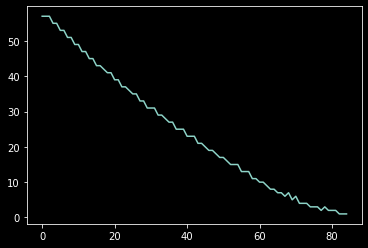

In [734]:
TEcounter = list(map(len,fiber_sol['HEβ'].values()))
plt.figure()
plt.plot(TEcounter)
plt.show()